# Part I - Analysis of Ford's GoBike trip data
## by Esther Goneh

## Table of contents
### [Introduction](#Introduction)
### [Data cleaning](#data-cleaning)
### [Structure of the dataset](#structure-of-the-dataset)
### [Univariate exploration](#univariate-exploration)
### [Bivariate exploration](#bivariate-exploration)
### [Multivariate exploration](#multivariate-exploration)
### [Conclusions](#conclusions)


## Introduction <a id='Introduction'></a>
This is the first part of the 2 part Udacity data analysis capstone project. 
In this part I will wrangle and explore the `201902-fordgobike-tripdata` (2019 ford gobike tripdata). First I will examine the column properties by performing univariate explorative data analysis. Further I will analyze the relationship between individual columns through the applycation of biviriate and multivariate explorative data analysis.
The dataset for this analysis consists of 183412 trip data of Ford Gobike users in the Sanfracisco area. 
Each trip is anonymize and contains data such as:
* Ride duration
* Ride start time
* Ride end time                  
* Start station id           
* Start station name         
* Start station latitude     
* Start station longitude    
* End station id             
* End station name           
* End station latitude       
* End station longitude      
* Bike id                    
* User type                  
* Member birth year          
* Member gender              
* Bike share for all trip   


## Preliminary Wrangling


In [63]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [64]:
# Load dataset into pandas dataframe.
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [65]:
# Shape of the dataset
df.shape

(183412, 16)

The dataset contains 16 columns and 183412 rows. That is 183412 individual trip data.

In [66]:
# View dataset summary.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [67]:
# describe the dataset.
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [68]:
# View 5 random samples of the actual dataset.
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
52864,636,2019-02-21 16:43:13.9010,2019-02-21 16:53:50.5080,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5968,Subscriber,1984.0,Male,No
28635,434,2019-02-25 08:31:54.9690,2019-02-25 08:39:09.1910,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5132,Subscriber,1983.0,Female,No
10703,478,2019-02-27 19:50:53.5430,2019-02-27 19:58:52.2890,102.0,Irwin St at 8th St,37.766883,-122.399579,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,6235,Subscriber,1992.0,Male,No
106981,435,2019-02-13 17:11:32.1470,2019-02-13 17:18:47.5220,24.0,Spear St at Folsom St,37.789677,-122.390428,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,425,Subscriber,1980.0,Male,No
93199,497,2019-02-15 17:53:35.7380,2019-02-15 18:01:53.2060,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6273,Subscriber,1968.0,Male,No


In [69]:
# View the first 5 rows to get a feel of the dataset.
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


member_birth_year and member_gender clumns contains missing values, visually explore this rows.

In [70]:
df[df.member_birth_year.isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
147,372,2019-02-28 22:46:19.1140,2019-02-28 22:52:31.4770,369.0,Hyde St at Post St,37.787349,-122.416651,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,2191,Customer,NaN,NaN,No
176,730,2019-02-28 22:28:50.5140,2019-02-28 22:41:00.8970,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,258.0,University Ave at Oxford St,37.872355,-122.266447,4784,Customer,NaN,NaN,No
220,1425,2019-02-28 22:05:25.5530,2019-02-28 22:29:11.1180,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,109.0,17th St at Valencia St,37.763316,-122.421904,6525,Subscriber,NaN,NaN,No
266,1302,2019-02-28 21:53:13.2740,2019-02-28 22:14:56.1730,181.0,Grand Ave at Webster St,37.811377,-122.265192,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,2471,Customer,NaN,NaN,No
292,1468,2019-02-28 21:43:04.3630,2019-02-28 22:07:32.6640,321.0,5th St at Folsom,37.780146,-122.403071,29.0,O'Farrell St at Divisadero St,37.782405,-122.439446,6040,Customer,NaN,NaN,No


Count the number of missing member_birth_year and member_gender values

In [71]:
df.member_birth_year.isnull().sum()

8265

In [72]:
df.member_birth_year.isnull().sum() * 100 / len(df)

4.506248228033062

In [73]:
# total number of null values in the dataset.
df.isnull().sum().sum()

17318

In [74]:
# Percentage of all the null values.
(df.isnull().sum().sum() / len(df.index)) * 100

9.4421302859136809

In [75]:
# Explore start_time column.
df.start_time.describe()

count                       183412
unique                      183401
top       2019-02-07 17:56:08.8970
freq                             2
Name: start_time, dtype: object

In [76]:
# Explore stop_time column
df.end_time.describe()

count                       183412
unique                      183397
top       2019-02-12 17:52:28.0280
freq                             2
Name: end_time, dtype: object

<a id='data-cleaning'></a>
## Data cleaning 

#### Define

The dataset contains about 17318 rows with null values. This is approximately 9.4% of the total row counts in the dataset.
Drop columns with null values.

#### Code

In [77]:
# 9.4% is negligible will not affect the final result. Drop Null's
df.dropna(inplace=True)

#### Test

In [78]:
# Check for nulls.
df.isnull().sum().sum()

0

#### Define

Change the data format of start_time and end_time from object to datetime format.

#### Code

In [79]:
df['start_time']= pd.to_datetime(df['start_time'])

In [80]:
df['end_time']= pd.to_datetime(df['end_time'])

#### Test

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory us

#### Define

Change start_station_id and end_station_id to int64 data format.

#### Code

In [82]:
df['start_station_id'] = df['start_station_id'].apply(np.int64)

In [83]:
df['end_station_id'] = df['end_station_id'].apply(np.int64)

#### Test

In [84]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

#### Define
Drop start_station_logitude/latitude and end_station_longitude/latitude they are not relevant to this analysis.

### Code

In [85]:
df.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], inplace=True)

### Test

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null int64
start_station_name         174952 non-null object
end_station_id             174952 non-null int64
end_station_name           174952 non-null object
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 17.4+ MB


<a id='structure-of-the-dataset'></a>
### What is the structure of your dataset?

The fordgobike dataset contains 183412 rows and and 16 columns. In summary the variable describes ride duration, ride time, station information and user information. Most of the data columns are in their expected data formats. Though, ride start and end time (start_time, end_time columns) are in object format; they are suppose to be in datetime format. The station Ids (start_station_id, end_station_id columns) are float64 while they are suppose to be int64. member_birth_year	and member_gender contains 8265 missing (NAN) values, this is aprroximately 4.51% of the total dataset.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest in the dataset is the ride duration. I am interested in examining how other features of the dataset impacts ride duration. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features of the dataset that will support this invetigation are:
1. Gender/Age (In seconds)
This feature of the dataset will be used to measure how individual's age or gender affects ride duration.
2. start_time and end_time
The days of the week that most rides are taken on will be determined from the start_time and end_time dataset feature.
3. start_station_id, start_station_name, end_station_id, end_station_name
The most popular stations will be derived from this feature of the datase.
4. user_type this feature of the dataset describes the type of user (Subscriber/Customer), It will be used to determine how user type affects ride duration.
5. bike_share_for_all_trip  will be used to explore how ride sharing affects duration.


<a id='univariate-exploration'></a>
## Univariate Exploration

I start by investigating the variables that describe our main features of interest. 

In [87]:
# Copy dataframe
df_bike = df.copy()

In [88]:
# check if the number of occurance of start_time is same as end_time.
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null int64
start_station_name         174952 non-null object
end_station_id             174952 non-null int64
end_station_name           174952 non-null object
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 17.4+ MB


In [89]:
# Convert start_time to day of week, add its value to ride_start_day_of_week column.
df_bike['ride_start_day_of_week'] = df_bike['start_time'].dt.day_name()

In [90]:
# Convert end_time to day of week, add its value to ride_end_day_of_week column.
df_bike['ride_end_day_of_week'] = df_bike['end_time'].dt.day_name()

### Define utility functions

In [91]:
# cout plot calls searborns countplot function to plot bar charts with the supplied variables.
def countplot(df, x, xlabel, ylabel, title, order=None):
    g = sb.countplot(data = df, x = x, order = order, color = sb.color_palette()[0])
    g.set(xlabel=xlabel, ylabel=ylabel, title=title)

In [92]:
# barplot call searborns barplot function to plot bar charts with the supplied variables.
def barplot(df, x, y, xlabel, ylabel, title, order=None):
    g = sb.barplot(data=df, x=x , y=y , color= sb.color_palette()[0], order=order)
    g.set(xlabel=xlabel, ylabel=ylabel, title=title)

In [93]:
# Plot percentage distribuiton on a pie chart
def plot_pie(df, labels, title, title_fontsize=None, explode=None):
    d = (df.value_counts(normalize=True) * 100)
    ax = d.plot.pie(autopct='%1.1f%%', labels=labels, explode=explode, startangle=0, figsize=(5, 5), shadow=True)
    ax.set_ylabel('')
    plt.title(title, fontsize=title_fontsize)

## Trip duration

In [94]:
df_bike.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

The average duration of the bicycle ride is 704.0 seconds or 11.73 minutes. The maximum value of 84548 secs looks too high. Seems as though there are outliners.

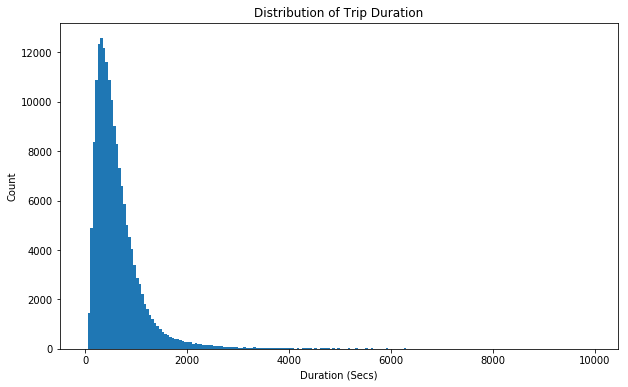

In [95]:
plt.figure(figsize=(10,6))
bins = np.arange(0, 10000, 50)
plt.hist(data=df_bike, x='duration_sec', bins=bins)
plt.xlabel('Duration (Secs)')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration');

The distribution of trip duration is skewed to the right. Further visualize the outiliners on boxplot.

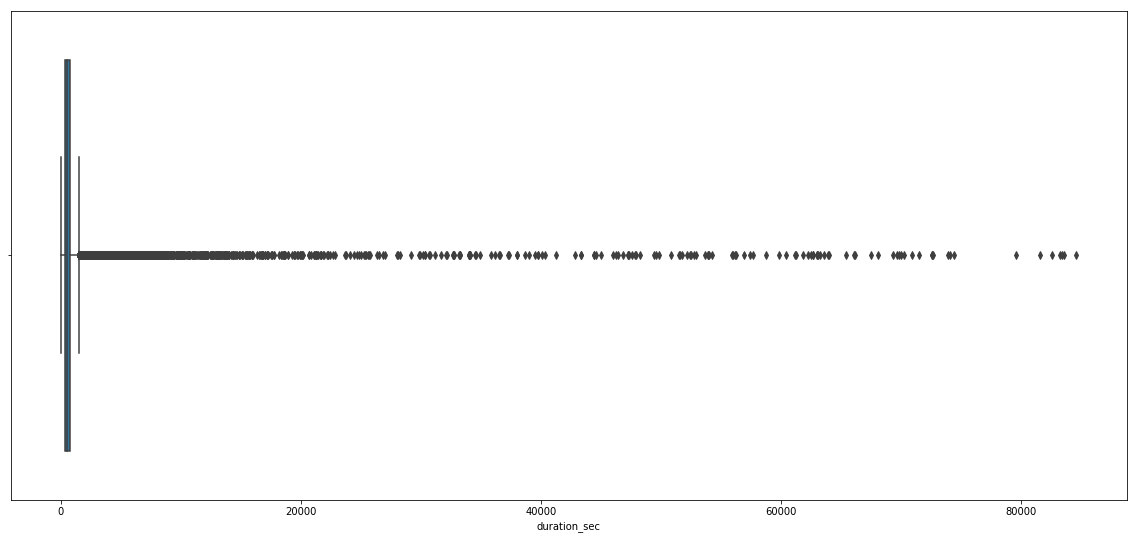

In [96]:
# View outliners on boxplot.
plt.figure(figsize=[20, 9])
sb.boxplot(x=df_bike["duration_sec"])
plt.show()

In [97]:
# Detect and drop outliers using Tukey’s IQR rule. For indept explanation of this method see: https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8
col = ['duration_sec']
Q1 = df_bike[col].quantile(0.25)
Q3 = df_bike[col].quantile(0.75)
IQR = Q3 - Q1
df_bike_temp = df_bike[~((df_bike[col] < (Q1 - 1.5 * IQR)) | (df_bike[col] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [98]:
# Confirm that outliners have been droped.
df_bike_temp['duration_sec'].describe()

count    165624.000000
mean        550.205840
std         304.287686
min          61.000000
25%         314.000000
50%         488.000000
75%         731.000000
max        1488.000000
Name: duration_sec, dtype: float64

In [99]:
((174952 - 165624)/174952) * 100

5.331748136631762

About 5.33% percent of the dataset are outliners that was dropped

In [100]:
df_bike = df_bike_temp.copy()

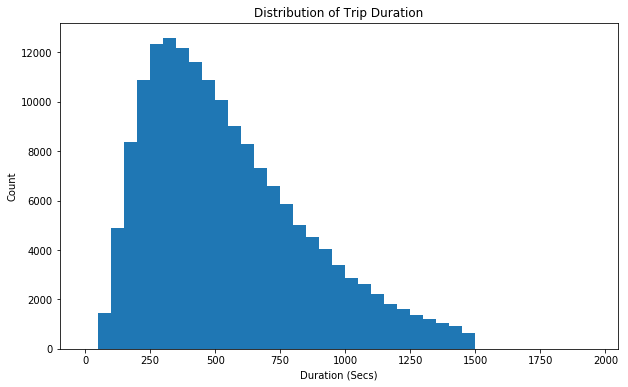

In [101]:
# Trip duration distributio with outlinners removed.
plt.figure(figsize=(10,6))
bins = np.arange(0, 2000, 50)
plt.hist(data=df_bike, x='duration_sec', bins=bins)
plt.xlabel('Duration (Secs)')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration');

The histogram shows that most of the trips lasted between 250 to 500 seconds.

## Number of rides by days of the week

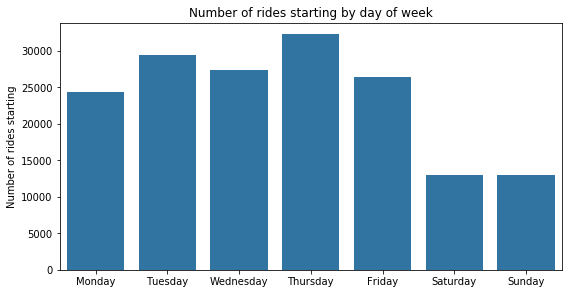

In [102]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=[9, 10])
plt.subplot(2, 1, 1)
countplot(df_bike, df_bike['ride_start_day_of_week'], "", "Number of rides starting", "Number of rides starting by day of week", order=day_order)

The highest number of rides starts on the Thursday, while the weekends (Saturday and Sunday) have the least number of rides.

## Number of rides by hour of day

In [103]:
# Convert start_time to hour of day the ride started.
df_bike['start_hour'] = df_bike['start_time'].dt.hour

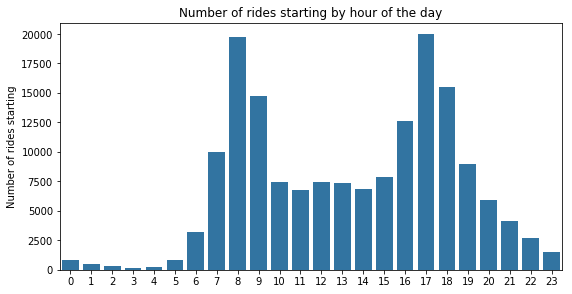

In [104]:
plt.figure(figsize=[9, 10])
plt.subplot(2, 1, 1)
countplot(df_bike, df_bike['start_hour'], "", "Number of rides starting", "Number of rides starting by hour of the day")

The highest number of rides takes place at 8AM and 5PM. This is consistent with the time individuals leaves for and return from work. 

## User type

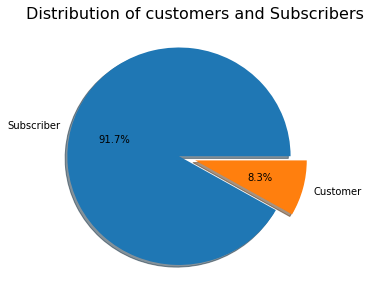

In [105]:
plot_pie(df_bike.user_type, ["Subscriber", "Customer"], "Distribution of customers and Subscribers", title_fontsize=16, explode=[0.15, 0])

The subscribers makes up 91.7% of the riders while customers consists of 8.3% of the riders.

## Gender

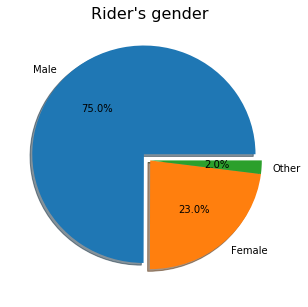

In [106]:
plot_pie(df_bike.member_gender, ["Male", "Female", "Other"], "Rider's gender", title_fontsize=16, explode=[0.08, 0, 0])

Males makes up 75% of all the riders while females consists of 23.0% of the riders. 2% are recorded as others.

## Station popularity

In [107]:
# Show top 15 start stations.
display(df_bike.start_station_name.value_counts()[:15])

Market St at 10th St                                         3542
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3346
Berry St at 4th St                                           2855
Montgomery St BART Station (Market St at 2nd St)             2608
San Francisco Caltrain (Townsend St at 4th St)               2525
Powell St BART Station (Market St at 4th St)                 2424
San Francisco Ferry Building (Harry Bridges Plaza)           2312
Howard St at Beale St                                        2167
Steuart St at Market St                                      2116
Powell St BART Station (Market St at 5th St)                 2003
The Embarcadero at Sansome St                                1722
2nd St at Townsend St                                        1666
Bancroft Way at College Ave                                  1665
Bancroft Way at Telegraph Ave                                1663
3rd St at Townsend St                                        1623
Name: star

In [108]:
# Show top 15 end stations
df_bike.end_station_name.value_counts()[:15]

San Francisco Caltrain Station 2  (Townsend St at 4th St)          4580
Market St at 10th St                                               3635
Montgomery St BART Station (Market St at 2nd St)                   3352
San Francisco Ferry Building (Harry Bridges Plaza)                 2918
San Francisco Caltrain (Townsend St at 4th St)                     2845
Powell St BART Station (Market St at 4th St)                       2725
Berry St at 4th St                                                 2707
Steuart St at Market St                                            2190
The Embarcadero at Sansome St                                      2020
Powell St BART Station (Market St at 5th St)                       2017
Howard St at Beale St                                              1903
Beale St at Harrison St                                            1742
Bancroft Way at Telegraph Ave                                      1679
Civic Center/UN Plaza BART Station (Market St at McAllister St) 

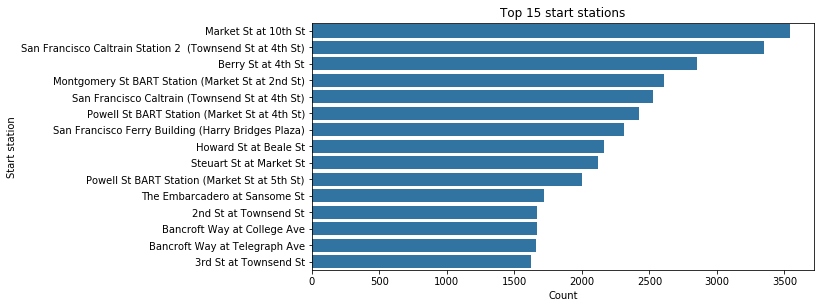

In [109]:
plt.figure(figsize=[9, 10])
plt.subplot(2, 1, 1)
df_temp = df_bike.start_station_name.value_counts()[:15].rename_axis('start_station_name').reset_index(name = "counts")
barplot(df_temp, x=df_temp['counts'], y=df_temp["start_station_name"], xlabel="Count", ylabel="Start station", title="Top 15 start stations")

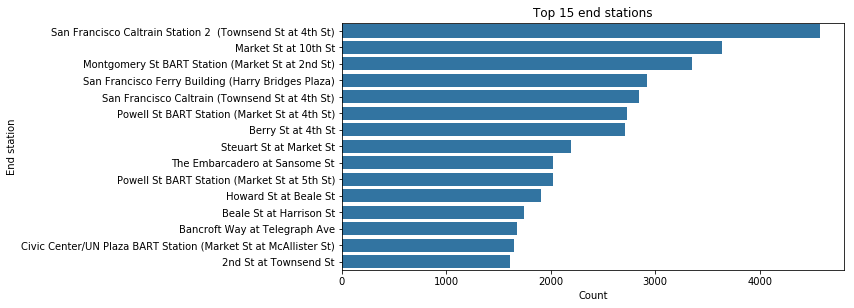

In [110]:
plt.figure(figsize=[9, 10])
plt.subplot(2, 1, 1)
df_temp = df_bike.end_station_name.value_counts()[:15].rename_axis('end_station').reset_index(name = "counts")
barplot(df_temp, x=df_temp['counts'], y=df_temp["end_station"], xlabel="Count", ylabel="End station", title="Top 15 end stations")

Most of the riders are either going to San Francisco Caltrain Station 2  (Townsend St at 4th St) or coming from Market St at 10th St 

## Age

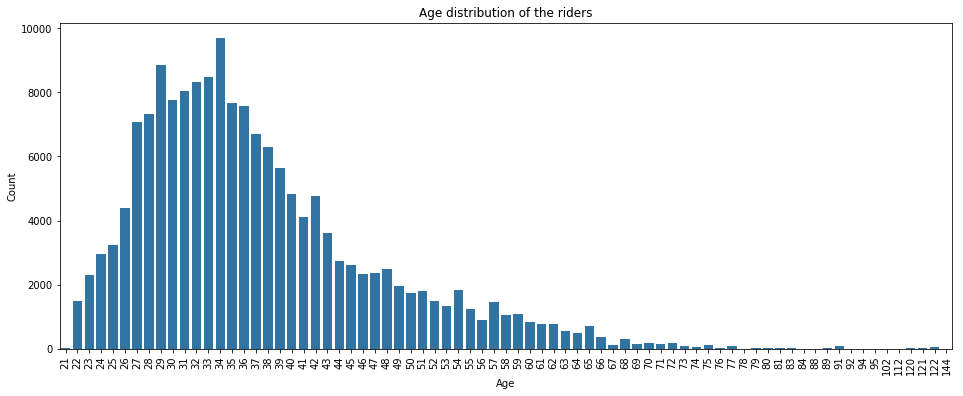

In [111]:
df_bike["age"] = (2022 - df_bike["member_birth_year"]).astype(int)
plt.figure(figsize=[16, 6])
countplot(df_bike, df_bike['age'], "Age", "Count", "Age distribution of the riders")
plt.xticks(rotation=90)
plt.show()

Most of the riders age fall between 25 years and 43 years, However the highest number of riders are aged 34 years followed by 29 years.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

+ Most gobike trips are short, the highest percentage of rides lasted between 250 to 500 seconds.
+ The highest number of are on the Thursday, followed by Tuesday, while the weekends (Saturday and Sunday) have the least number of rides.
+ The highest number of rides takes place at 8AM and 5PM. Most Gobike riders use it to go to and return from work.
+ 91.7% of the riders are customers.
+ 75% of all the riders are Males.
+ Market St at 10th St is the most popular orignating station while San Francisco Caltrain Station 2  (Townsend St at 4th St) is the most popular ending station.
+ Most of the riders age fall between 25 years and 43 years, However the highest number of riders are aged 34 years followed by 29 years.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

+ The trip duration contain outliners, the max duration is 84548 secs while the min duration is 61 secs. Probably the outliners are individual who forgot to return the bike to the end station. I used Tukey’s IQR rule to detect the outliners, then dropped them so they will not skew the findings.

<a id='bivariate-exploration'></a>
## Bivariate Exploration

## The impacts of user type on ride duration

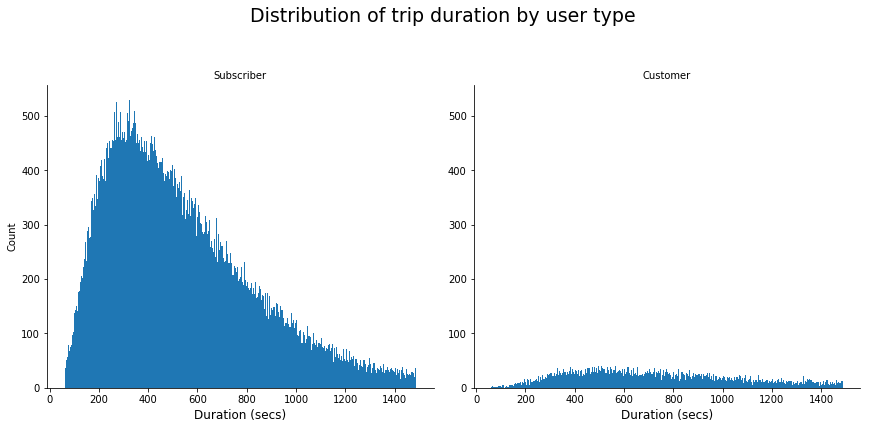

In [112]:
g = sb.FacetGrid(data = df_bike, col = 'user_type', size=6)
g.map(plt.hist, 'duration_sec', bins = np.arange(df_bike['duration_sec'].min(), df_bike['duration_sec'].max()+1, 2))
g.set_ylabels('Count')
g.set_xlabels('Duration (secs)', fontsize=12)
g.set_titles('{col_name}');

plt.subplots_adjust(top=0.8)
g.fig.suptitle('Distribution of trip duration by user type', fontsize=19);

Histogram above shows that the avarage tripe duration for subscribers are generally higher than that of customers.

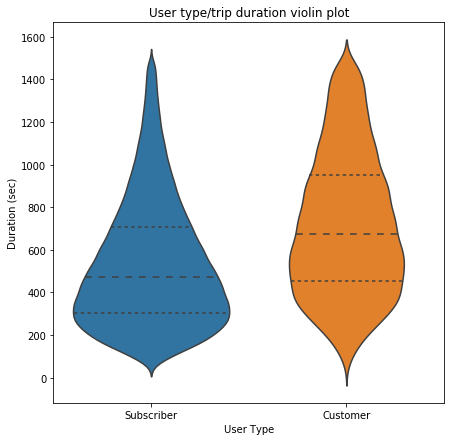

In [113]:
plt.figure(figsize=[7, 7])
gx = sb.violinplot(data = df_bike, x = 'user_type', y = 'duration_sec', inner='quartile')
gx.set(xlabel="User Type", ylabel="Duration (sec)", title="User type/trip duration violin plot")
plt.show()


Violin plot shows that while the avarage tripe duration for subscribers are generally higher than that of customers, there are more customers taking trip compared to subscribers.

## How age affects ride duration

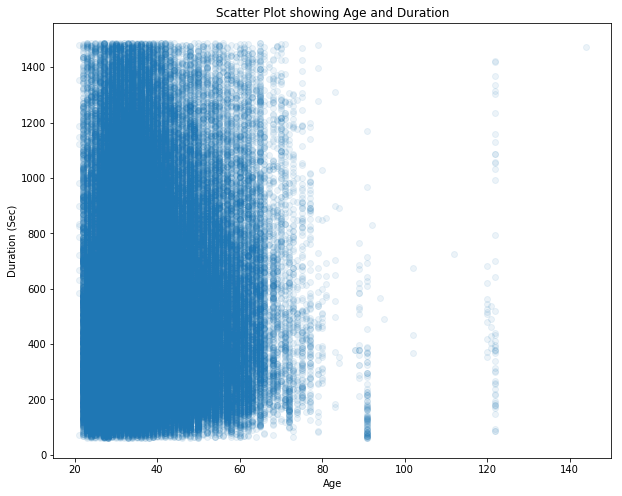

In [114]:
plt.figure(figsize=[10, 8])
g = sb.regplot(data=df_bike, x='age',y='duration_sec', fit_reg=False, scatter_kws={'alpha':1/12})
g.set(xlabel="Age", ylabel="Duration (Sec)", title="Scatter Plot showing Age and Duration")
plt.show()

The scatter plot shows an inverse correlaton between age and duration. That is older people are more likely to make trips with short durations.

## Gender and duration

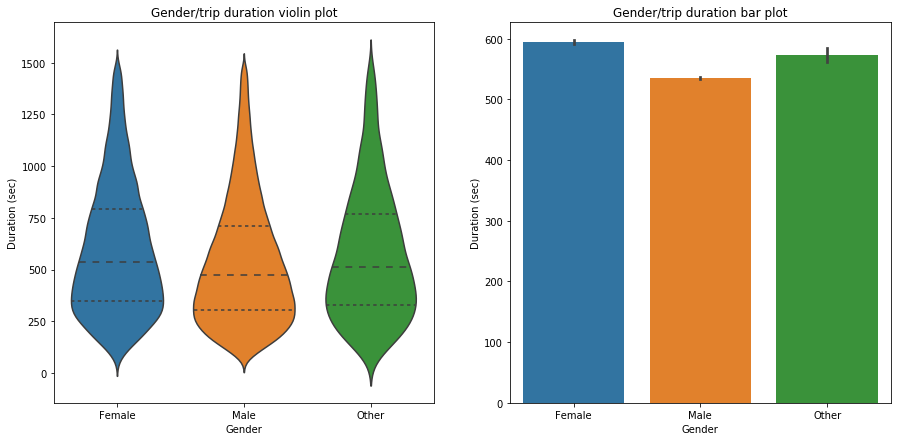

In [115]:
plt.figure(figsize=[15, 7])
plt.subplot(1, 2, 1)
gx = sb.violinplot(data = df_bike, x = 'member_gender', y = 'duration_sec', inner='quartile')
gx.set(xlabel="Gender", ylabel="Duration (sec)", title="Gender/trip duration violin plot")

plt.subplot(1, 2, 2)
gx = sb.barplot(data = df_bike, x = 'member_gender', y = 'duration_sec')
gx.set(xlabel="Gender", ylabel="Duration (sec)", title="Gender/trip duration bar plot")
plt.show()

Females trip duration is slightly longer than male trips.

## Age and bike shared

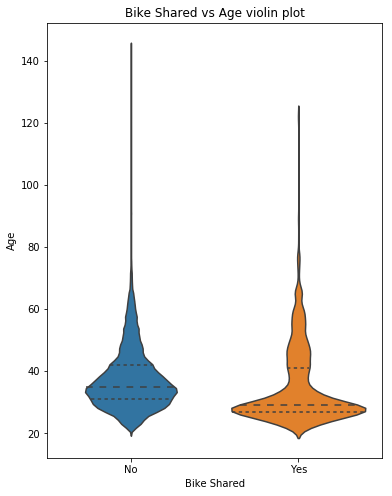

In [116]:
plt.figure(figsize=[6, 8])
gx = sb.violinplot(data = df_bike, x = 'bike_share_for_all_trip', y = 'age', inner='quartile')
gx.set(xlabel="Bike Shared", ylabel="Age", title="Bike Shared vs Age violin plot")
plt.show()

Younger people share rides more than older people.

## How gender inpacts ride sharing

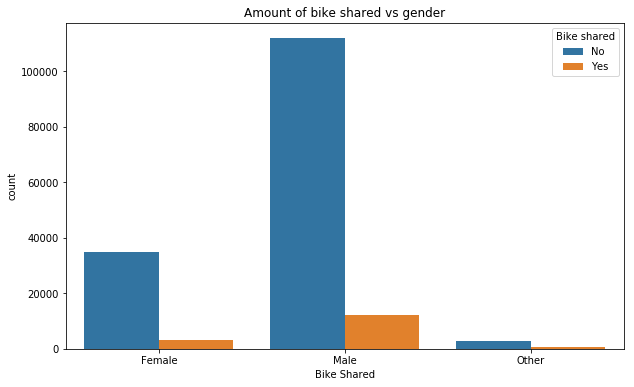

In [117]:
plt.figure(figsize=[10, 6])
gx = sb.countplot(data = df_bike, x = 'member_gender', hue = 'bike_share_for_all_trip')
gx.set(xlabel="Bike Shared", title="Amount of bike shared vs gender")
plt.gca().legend().set_title('Bike shared');
plt.show()

More males shared bikes in comparison with female riders.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

+ The avarage tripe duration for subscribers are higher than that of customers. But generally there are more customers than subscribers.
+ Older people take rides with short duration when compared with younger riders.
+ Though there are more male riders female trips duration is slightly longer than male trips. This makes sense since males are more likely to ride at higher speeds. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

+ Younger people share rides more than older people.
+ Ratio of males that shared bikes are higher than number of female riders that shared bikes.

<a id='multivariate-exploration'></a>
## Multivariate Exploration

### User type, ride starting hour and duration

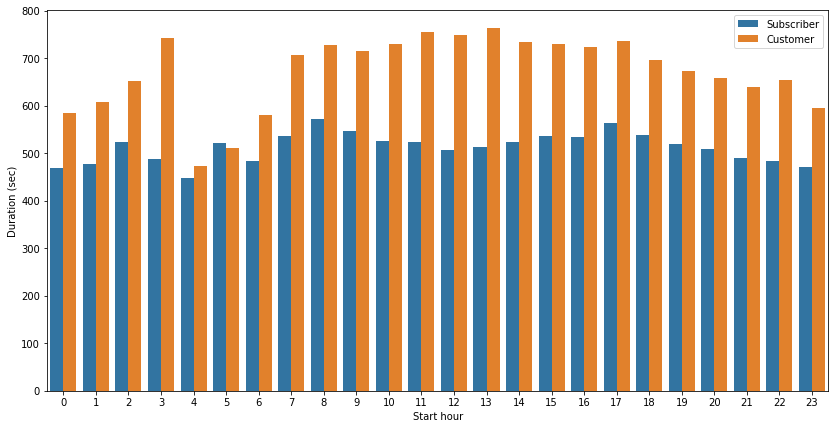

In [118]:
plt.figure(figsize=[14, 7])
gx = sb.barplot(data=df_bike, x='start_hour', y='duration_sec', ci=None, hue='user_type')
gx.set(xlabel="Start hour", ylabel="Duration (sec)", title="")
plt.gca().legend().set_title('');
plt.show()

The duration of ride is shortest both for customers and subscribers at 4AM, interestingly the customers have the longest ride duration during 3AM and 1PM. Generally customer's trip duration constitenly rise from 4Am, it peaks at 1PM and constently drops till 11PM, it starts rising again and peaks by 3AM. Subscribers ride duration is consistent throught the day with drop between 9AM and 3PM and between 2AM and 6AM. 

## User type, ride day of week and ride duration

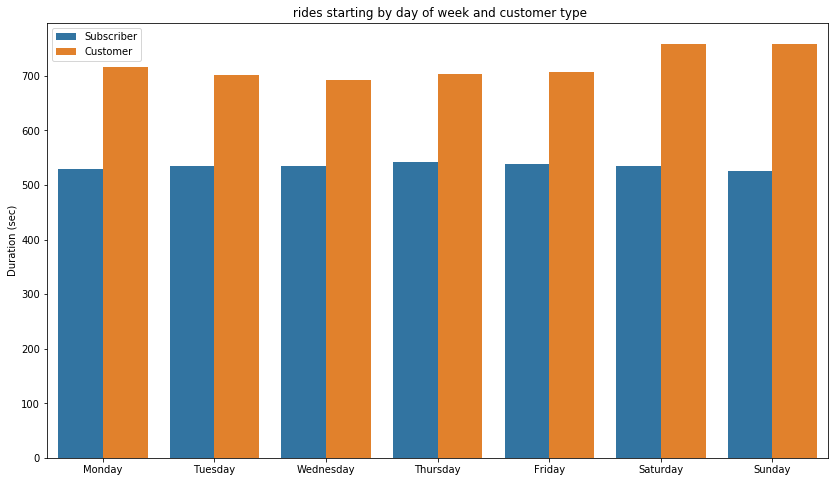

In [119]:
plt.figure(figsize=[14, 8])
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
gx = sb.barplot(data=df_bike, x='ride_start_day_of_week', y='duration_sec', order=day_order, ci=None, hue='user_type')
gx.set(xlabel="", ylabel="Duration (sec)", title=" rides starting by day of week and customer type")
plt.gca().legend().set_title('');
plt.show()

The duration of ride for subscribers is pretty much the same throught the week, the customers however take longer rides during the weekend.

## Hourly and weekly rides for customers and subscribers

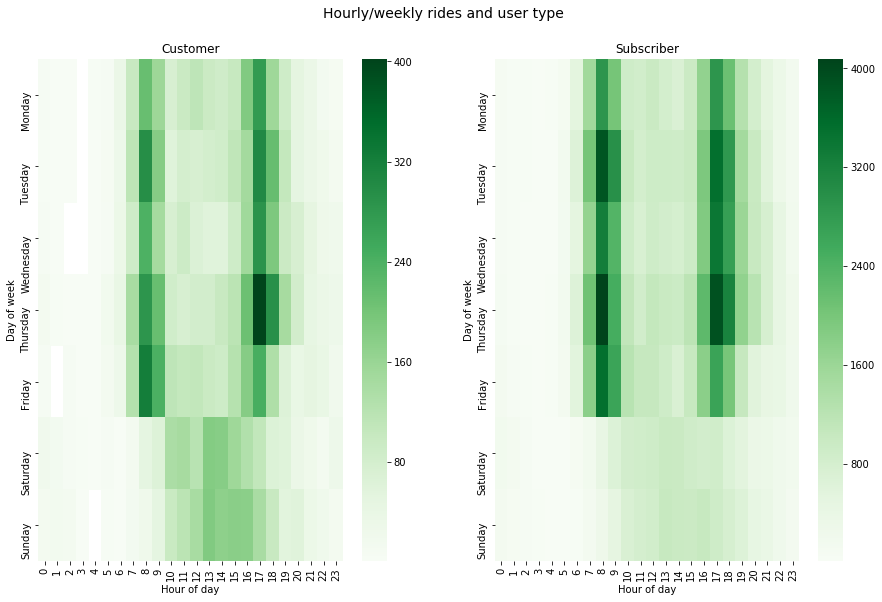

In [120]:
plt.figure(figsize=[15, 9])
plt.subplot(1, 2, 1)
customers = df_bike.query('user_type == "Customer"')
cust_num = customers.groupby(['ride_start_day_of_week', 'start_hour']).size().reset_index(name='count')
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cust_num['ride_start_day_of_week'] = pd.Categorical(cust_num['ride_start_day_of_week'], categories=days, ordered=True)
cust_num = cust_num.pivot(index='ride_start_day_of_week', columns='start_hour', values='count')
sb.heatmap(cust_num, cmap="Greens");
plt.title('Customer');
plt.xlabel('Hour of day');
plt.ylabel('Day of week');

plt.subplot(1, 2, 2)
customers = df_bike.query('user_type == "Subscriber"')
cust_num = customers.groupby(['ride_start_day_of_week', 'start_hour']).size().reset_index(name='count')
cust_num['ride_start_day_of_week'] = pd.Categorical(cust_num['ride_start_day_of_week'], categories=days, ordered=True)
cust_num = cust_num.pivot(index='ride_start_day_of_week', columns='start_hour', values='count')
sb.heatmap(cust_num, cmap="Greens");
plt.title('Subscriber');
plt.xlabel('Hour of day');
plt.ylabel('Day of week');

plt.subplots_adjust(top=0.9)
plt.suptitle('Hourly/weekly rides and user type', fontsize=14);
plt.show()

The Subscribers primarily use the bikes from Monday to Friday between 7AM - 9AM and 4PM - 6PM.  While customers use bikes on weekdays they also use it during the weekends between 9AM - 6PM.

## Age, customer type, and duration

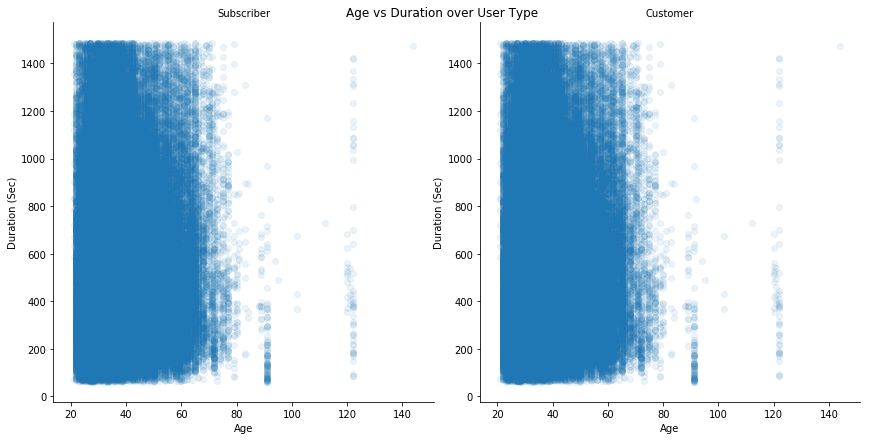

In [121]:
gx = sb.FacetGrid(data=df_bike, col='user_type', size=6,)
gx.map(sb.regplot, data=df_bike, x='age',y='duration_sec', fit_reg=False, scatter_kws={'alpha':1/12})
gx.set_titles('{col_name}')
gx.set(xlabel="Age", ylabel="Duration (Sec)")
plt.suptitle('Age vs Duration over User Type')
plt.show()

There is no noticable impact of user type on age and duration.

## Bike shared, Gender and duration

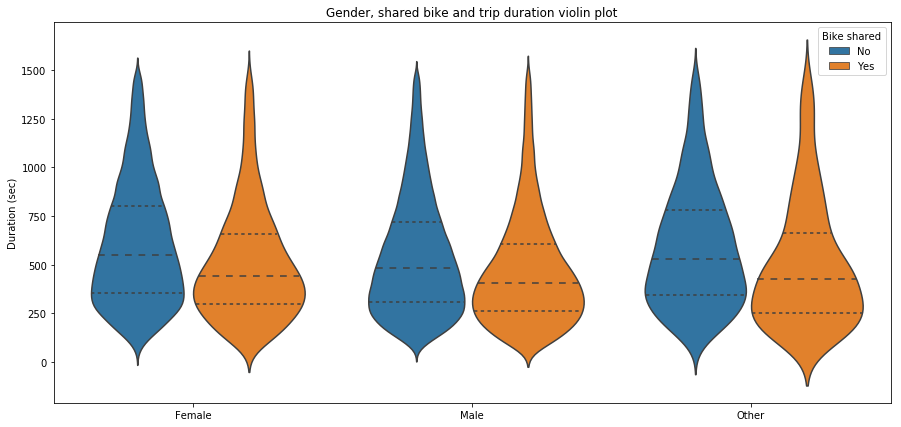

In [122]:
plt.figure(figsize=[15, 7])
gx = sb.violinplot(data = df_bike, x = 'member_gender', y = 'duration_sec', inner='quartile', hue='bike_share_for_all_trip')
gx.set(xlabel="", ylabel="Duration (sec)", title="Gender, shared bike and trip duration violin plot")
plt.gca().legend().set_title('Bike shared');
plt.show()

Shared bike have the shorter trip duration across genders.

## Gender, user type and trip duration

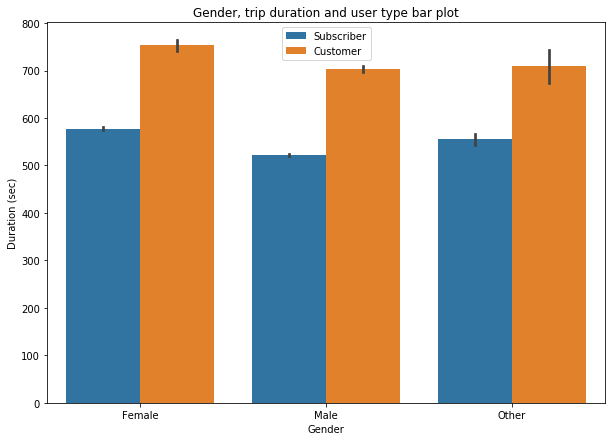

In [123]:
plt.figure(figsize=[10, 7])
gx = sb.barplot(data = df_bike, x = 'member_gender', y = 'duration_sec', hue='user_type')
gx.set(xlabel="Gender", ylabel="Duration (sec)", title="Gender, trip duration and user type bar plot")
plt.gca().legend().set_title('');
plt.show()

Customers have the the shorter trip duration across genders.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

+ Customers have the the shorter trip duration across all genders.
+ Irrespective of gender users sharing bike have the shorter trip duration.
+ The Subscribers primarily use the bikes from Monday to Friday between 7AM - 9AM and 4PM - 6PM.  While customers use bikes on weekdays they also use it during the weekends between 9AM - 6PM.
+ The duration of ride for subscribers is pretty much the same throught the week, the customers however take longer rides during the weekend.

### Were there any interesting or surprising interactions between features?

Customers have very high ride duration by 3AM. It is suprising, before this data exploration I never imagine people go out at night with electric bikes.

In [124]:
# Export dataframe for use on the slide.
df_bike.to_csv('df_bike_clean.csv', index=None)

<a id='conclusions'></a>
## Conclusions
* Subscribers use gobikes primarily to go and return from work, while customers are laisure users.
* Males and younger individuals are more like to share bikes.
* Individuals sharing bike use it for short trips.
* Females and young individuals are more likely to take longer trip durations. 
